# 볼린저 밴드
1. 파일로드
2. 결측치와 이상치를 제거
3. 시간, 종가만의 데이터프레임을 생성
4. 이동 평균성: 데이터 20개의 평균을 구해서 새로운 파생변수 대입
5. 상댄 밴드: 이동 평균선 +(2 * 데이터 20개의 표준편차)
6. 하단 밴드: 이동 평균성 -(2 * 데이터 20개의 표준편차)
7. 구매 상태를 확인하는 파생변수 생성
8. 구매 상태 입력
9. 수익율 계산

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('../csv/GM.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000


In [41]:
df=df.loc[~df.isin((np.nan,np.inf,-np.inf)).any(axis=1)]

In [42]:
price_df=df[['Adj Close']]
price_df.head(1)

,Adj Close
Date,
2010-11-18,27.027195


In [43]:
# 이동 평균선 :  종가 데이터 20개의 평균값

price_df['center']=price_df['Adj Close'].rolling(20).mean()

C:\Users\dgh06\AppData\Local\Temp\ipykernel_27568\4213344227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['center']=price_df['Adj Close'].rolling(20).mean()


In [44]:
# price_df.head()

In [45]:
# ub,lb 두개의 파생변수 생성

price_df['ub']=price_df['center']+(2*price_df['Adj Close'].rolling(20).std())
price_df['lb']=price_df['center']-(2*price_df['Adj Close'].rolling(20).std())

C:\Users\dgh06\AppData\Local\Temp\ipykernel_27568\3700153101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['ub']=price_df['center']+(2*price_df['Adj Close'].rolling(20).std())
C:\Users\dgh06\AppData\Local\Temp\ipykernel_27568\3700153101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['lb']=price_df['center']-(2*price_df['Adj Close'].rolling(20).std())


In [46]:
price_df.tail()

,Adj Close,center,ub,lb
Date,,,,
2019-06-18,36.700001,35.249369,37.239697,33.259041
2019-06-19,36.779999,35.251553,37.248834,33.254271
2019-06-20,36.959999,35.340899,37.478352,33.203445
2019-06-21,36.919998,35.449022,37.678999,33.219046
2019-06-24,36.814999,35.552390,37.836478,33.268302


In [47]:
tset_df= price_df.tail(1000)

<Axes: xlabel='Date'>

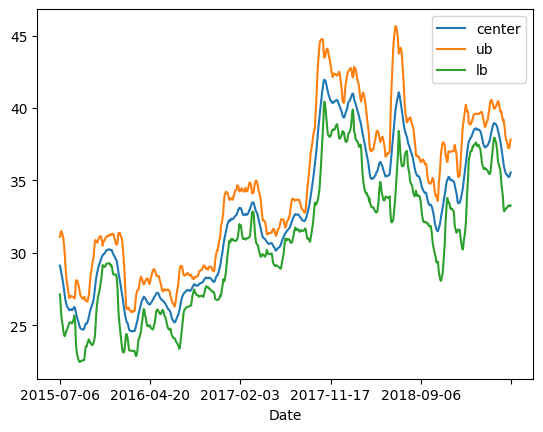

In [48]:
tset_df.drop("Adj Close",axis=1).plot()

In [49]:
start = "2011-01-02"
price_df2 = price_df.loc[start:]
price_df2.head(2)

,Adj Close,center,ub,lb
Date,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661
2011-01-04,29.959959,27.569085,29.692262,25.445907


In [50]:
# 거래 내역이라는 파생변수
price_df2['trade']=""

C:\Users\dgh06\AppData\Local\Temp\ipykernel_27568\88495912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['trade']=""


### 구매 내역 추가
- 조건 
    1. 상단 밴드보다 종가가 높은 높은 경우
        - 현재 구매 상태이면
                - 매도 trade=""
        - 현재 구매 상태가 아니면
                - 아무 행동도 하지 않는다. trade=""
    2. 하단 밴드보다 종가가 낮은 경우
        - 현재 구매 상태이면
            - 아무 행동도 하지 않는다. trade="buy"
        - 구매 상태가 아니면
            -매수 trade='buy'
    3. 하단밴드와 상단 밴드 사이에 종가가 존재하는 경우
        - 현재 구매 상태이면
            - 아무 행동도 하지 않는다. trade='buy'
        - 현재 구매 상태가 아니면
            - 아무 행동도 하지 않는다. trade=""

In [51]:
for i in price_df2.index:
    # 상단 밴드보다 종가가 높은 경우
    if price_df2.loc[i,"Adj Close"]> price_df2.loc[i,"ub"]:
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i,'trade']=='buy':
            #매도
            price_df2.loc[i,'trade']=''
        else:
            price_df2.loc[i,'trade']=''
        
        # 하단 밴드보다 종가가 낮은 경우
    elif price_df2.loc[i,"Adj Close"]< price_df2.loc[i,'lb']:
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i,'trade']=="buy":
            # 구매 상태를 유지
            price_df2.loc[i,'trade']= 'buy'
        else:
            price_df2.loc[i,'trade']='buy'
    else:
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i,'trade']=='buy':
            #구매 상태를 유지
            price_df2.loc[i,'trade']='buy'
        else:
            price_df2.loc[i,'trade']=''

In [52]:
price_df2['trade'].value_counts()

buy    1130
       1002
Name: trade, dtype: int64

### 수익율 계산

1. 구매한 날의 종가
    - 전날의 trade 항목의 값이 ''이고, 현재의 trade가 'buy'인 날의 종가
2. 판매한 날의 종가
    - 전날의 trade가 'buy',현재의   trade가 ''인 날의 종가
3. 수익율 계산
    - (판매 가격-구매가격)/구매가격 + 1
4. 구매 가격과 판매 가격을 초기화
5. 여러개의 수익율 발생
6. 여러개의 수익율을 가지고 누적 수익율 계산

In [56]:
price_df2.loc['2019-01-11']

Adj Close    36.424309
center       33.536718
ub           35.750139
lb           31.323298
trade                 
return         1.12735
acc_rtn       1.176431
Name: 2019-01-11, dtype: object

In [53]:
rtn=1.0

price_df2["return"]=1
buy=0.0
sell=0.0

for i in price_df2.index:
    # 구매가를 출력
    if (price_df2.shift(1).loc[i,'trade']=="") and (price_df2.loc[i,'trade']=="buy"):
        buy =price_df2.loc[i,"Adj Close"]
        print('진입일 :',i, '구매가격 :',buy)
    # 판매가를 출력
    elif (price_df2.shift(1).loc[i,'trade']=="buy") and (price_df2.loc[i,'trade']==""):
        sell=price_df2.loc[i,'Adj Close']
        rtn =(sell-buy)/buy +1
        price_df2.loc[i,'return'] =rtn
        print('판매일 :',i, "판매가격 :",sell, '수익율 :', rtn)

    # 구매가, 판매가 초기화
    if price_df2.loc[i,'trade']=='':
        buy=0.0
        sell=0.0

C:\Users\dgh06\AppData\Local\Temp\ipykernel_27568\2736537093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2["return"]=1


진입일 : 2011-02-02 구매가격 : 28.205038
판매일 : 2011-04-05 판매가격 : 25.983728 수익율 : 0.9212442117610337
진입일 : 2011-06-02 구매가격 : 23.398802
판매일 : 2011-07-07 판매가격 : 25.137901 수익율 : 1.0743242752342619
진입일 : 2011-07-27 구매가격 : 22.244669
판매일 : 2012-01-05 판매가격 : 17.525387 수익율 : 0.7878466072028314
진입일 : 2012-03-06 구매가격 : 19.43049
판매일 : 2012-04-02 판매가격 : 21.15378 수익율 : 1.0886899918633035
진입일 : 2012-04-09 구매가격 : 19.1301
판매일 : 2012-08-07 판매가격 : 16.142014 수익율 : 0.8438018619871303
진입일 : 2013-02-20 구매가격 : 21.42255
판매일 : 2013-03-20 판매가격 : 23.082602 수익율 : 1.0774908682673165
진입일 : 2013-06-20 구매가격 : 25.738686
판매일 : 2013-09-10 판매가격 : 29.248499 수익율 : 1.1363633326114626
진입일 : 2013-10-03 구매가격 : 27.896749
판매일 : 2013-10-30 판매가격 : 29.430317 수익율 : 1.0549730006173836
진입일 : 2014-01-16 구매가격 : 30.8295
판매일 : 2014-03-05 판매가격 : 29.659563 수익율 : 0.9620513793606772
진입일 : 2014-03-13 구매가격 : 26.948151
판매일 : 2014-06-04 판매가격 : 29.125372 수익율 : 1.080792964237138
진입일 : 2014-07-24 구매가격 : 28.74103
판매일 : 2014-11-17 판매가격 : 26.210114 수익율 : 0.911

In [54]:
# 누적 수익율

acc_rtn =1.0

for i in price_df2.index:
    rtn=price_df2.loc[i,'return']
    acc_rtn *=rtn
    price_df2.loc[i,"acc_rtn"]=acc_rtn


print('누적 수익율:', acc_rtn)

누적 수익율: 1.1764314536564138


C:\Users\dgh06\AppData\Local\Temp\ipykernel_27568\3433202736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2.loc[i,"acc_rtn"]=acc_rtn


In [55]:
price_df2.iloc[400:420]

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2012-08-03,15.841622,15.463367,16.088070,14.838664,buy,1.000000,0.848899
2012-08-06,15.691425,15.448743,16.034625,14.862860,buy,1.000000,0.848899
2012-08-07,16.142014,15.473248,16.131447,14.815050,,0.843802,0.716303
2012-08-08,16.110388,15.492220,16.201580,14.782861,,1.000000,0.716303
2012-08-09,16.323826,15.544393,16.336778,14.752008,,1.000000,0.716303
2012-08-10,16.236874,15.580756,16.431054,14.730459,,1.000000,0.716303
2012-08-13,16.181538,15.623839,16.505230,14.742447,,1.000000,0.716303
2012-08-14,15.976005,15.647949,16.540671,14.755227,,1.000000,0.716303
2012-08-15,15.920670,15.650715,16.546612,14.754819,,1.000000,0.716303
